# Description
## Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

# Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

## Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

### Data Dictionary

Sl_No: Primary key of the records<br> 
Customer Key: Customer identification number<br> 
Average Credit Limit: Average credit limit of each customer for all credit cards<br> 
Total credit cards: Total number of credit cards possessed by the customer<br> 
Total visits bank: Total number of visits that customer made (yearly) personally to the bank<br> 
Total visits online: Total number of visits or online logins made by the customer (yearly)<br> 
Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)<br> 

# Imports

In [77]:
# to read read and manipulate the data
import pandas as pd
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Setting limit to display rows
pd.set_option("display.max_rows", 200)
# Removing limit to display columns
pd.set_option("display.max_columns", None)

# to scale the data with zscore
from sklearn.preprocessing import StandardScaler

# to calculate distances
from scipy.spatial.distance import cdist, pdist

# To calculate the cophenetic correlations, dendrograms and linkages
from scipy.cluster.hierarchy import cophenet, linkage, dendrogram

# to compute the silhouette scores
from sklearn.metrics import silhouette_score

# To perform  the Kmeans and Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering, KMeans

# To visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

# To make thepython code more readable
%load_ext nb_black

# to avoid warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Load the data

In [78]:
# Load the data
bdata = pd.read_excel("Credit+Card+Customer+Data.xlsx")

<IPython.core.display.Javascript object>

In [79]:
# copying the data to another variable to avoid any changes to original data
data = bdata.copy()

<IPython.core.display.Javascript object>

# Checking the shape of data

In [80]:
# Checking the shape of data
data.shape

(660, 7)

<IPython.core.display.Javascript object>

#### Observations
The data has 660 rows and 7 columns

In [81]:
# checking the first 5 rows of data
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [82]:
# viewing random 7 rows of dataset
data.sample(7)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
390,391,31113,11000,4,2,0,4
427,428,64519,50000,7,5,2,2
508,509,27117,59000,7,2,0,3
208,209,40486,11000,2,0,3,9
320,321,33240,12000,6,5,2,1
161,162,78473,8000,3,2,5,5
280,281,22919,7000,6,4,1,2


<IPython.core.display.Javascript object>

# Checking the dataypes of the columns

In [83]:
# checking the datatypes and non null values of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

#### Observations
1. The dataset has 6 columns and all 6 columns are of int type
2. there are no missing values in the data.
3. The S.NO can be removed as it is of lesser importance.

# Statistical Summary of the dataset

In [84]:
# Data Summary
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


<IPython.core.display.Javascript object>

#### Observations
1. The average value for Avg_Credit_Limit for customers is about 34574.24 and it has a wide range varying from 3000 to 200000. There are outliers present. It has a median of 18000.
2. The average credit cards(Total_Credit_Cards ) held by customers is 5. It ranges from 1 to 10 credit cards with a median of 5.
3. The average number fo physical visits to the bank is 2 and the value ranges from 0 visit to 5 visits.
4.  The average number fo online visits to the bank is 3 and the value ranges from 0 visit to 15 visits.
5. The average number of calls made to the bank is 4 and the value ranges from 0 to 10 calls.

# Data preprocessing

In [85]:
# getting the numeric columns
num_cols = [
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
]

<IPython.core.display.Javascript object>

## Dropping the SL.No and Customer Key columns

In [86]:
data.drop(["Sl_No", "Customer Key"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Observations
1. "Sl_No" and "Customer Key" are not needed while we train our Clustering model Hence we drop these two columns.

## Checking for null values

In [87]:
# checking for missing values

data.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

#### Observation
1. There are no missing values in the data

## Checking for duplicate values

In [88]:
# Checking for duplicates
data.duplicated().sum()

11

<IPython.core.display.Javascript object>

In [89]:
# Checking rows with duplicates
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


<IPython.core.display.Javascript object>

#### Observation
1. The above shows that there are no exact duplicates in the data.
2. Hence they show important patterns. We will not delete them and keep them for clustering.

## Outlier Analysis

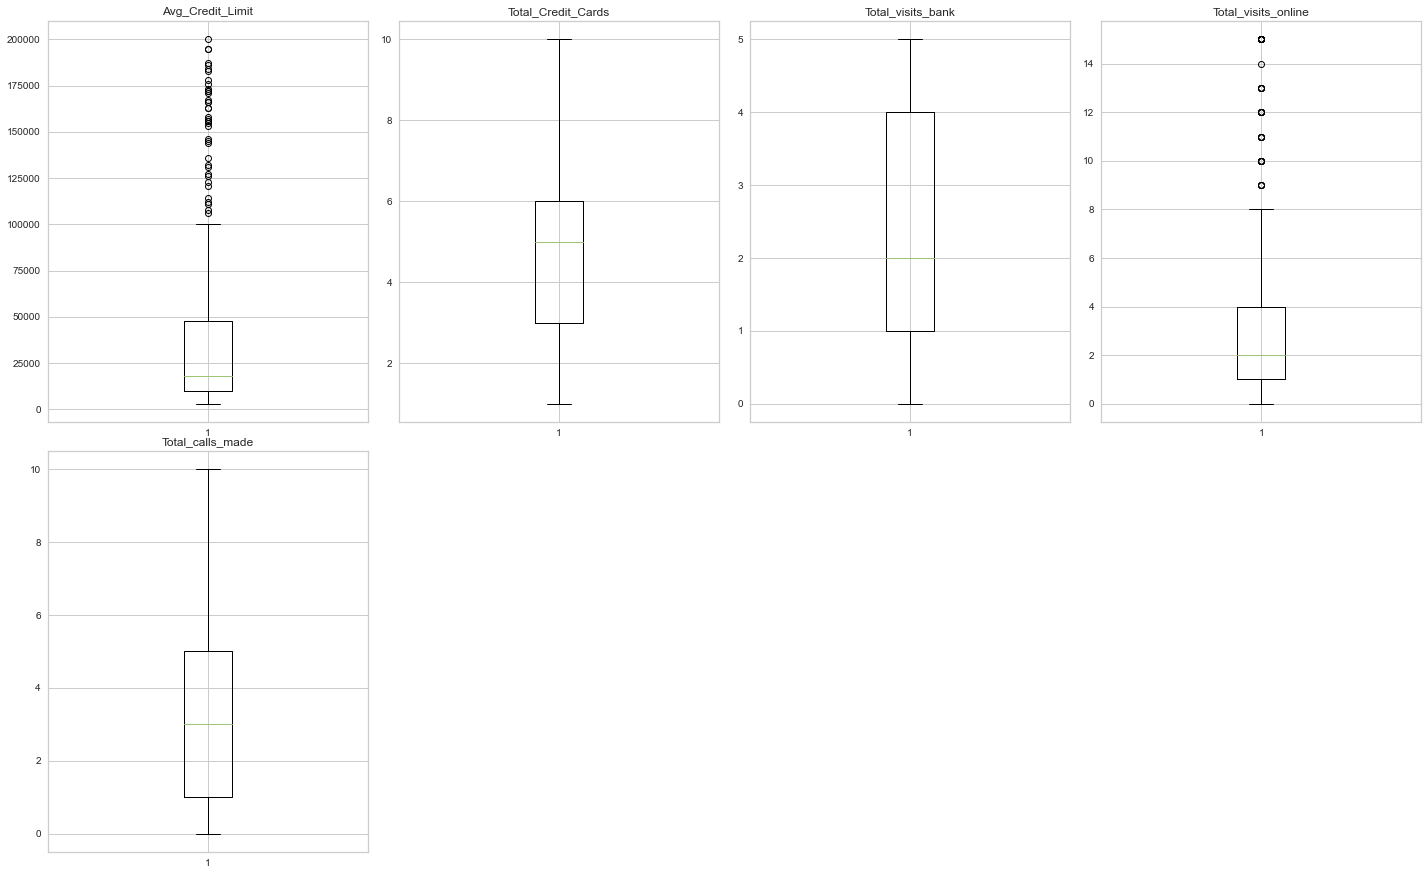

<IPython.core.display.Javascript object>

In [90]:
plt.figure(figsize=(20, 30))
for i, val in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[val], whis=1.5)  # plot box plot
    plt.tight_layout()
    plt.title(val)
plt.show()

#### Observations
1. Avg_Credit_Limit has upper outliers
2. Total_visits_online has upper outliers

## Outlier Detection using the IQR method

### Avg_Credit_Limit Outlier Detection

In [91]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(
    data["Avg_Credit_Limit"][data["Avg_Credit_Limit"].notnull()], [0.25, 0.75]
)
Avg_Credit_Limit_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Avg_Credit_Limit_4iqr}")
# getting the values
outlier_Avg_Credit_Limit_4iqr = data.loc[
    np.abs(data["Avg_Credit_Limit"] - data["Avg_Credit_Limit"].median())
    > Avg_Credit_Limit_4iqr,
    "Avg_Credit_Limit",
]
outlier_Avg_Credit_Limit_4iqr.nunique()

Q1 = 10000.0, Q3 = 48000.0, 4*IQR = 152000.0


11

<IPython.core.display.Javascript object>

#### Observations
1. There are 11 observations beyond the 4* times IQR range for the Avg_Credit_Limit Column.
2. All the data are important for the model to make Clusters They can form a new clusters as well. Hence we will not remove the outliers. They hold valuable informations.

### Total_visits_online Outlier Detection

In [92]:
# Finding the quartiles Q1 ,Q3, IQR and  4IQR
quartiles = np.quantile(
    data["Total_visits_online"][data["Total_visits_online"].notnull()], [0.25, 0.75]
)
Total_visits_online_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Total_visits_online_4iqr}")
# getting the values
outlier_Total_visits_online_4iqr = data.loc[
    np.abs(data["Total_visits_online"] - data["Total_visits_online"].median())
    > Total_visits_online_4iqr,
    "Total_visits_online",
]
outlier_Total_visits_online_4iqr.nunique()

Q1 = 1.0, Q3 = 4.0, 4*IQR = 12.0


1

<IPython.core.display.Javascript object>

#### Observations
1. There is only 1 observations beyond the 4* times IQR range for the Total_visits_online Column.
2. All the data are important for the model to make Clusters . Hence we will not remove the outliers. They hold valuable informations.

## tmean outlier detection

### Avg_Credit_Limit tmean Outlier Detection

In [93]:
Avg_Credit_Limit = data["Avg_Credit_Limit"][data["Avg_Credit_Limit"].notnull()]

from scipy.stats import tmean

# tmean removing tails of the data
print(tmean(Avg_Credit_Limit, limits=np.quantile(Avg_Credit_Limit, [0.1, 0.9])))
# tmean removing tails of the data
print(tmean(Avg_Credit_Limit, limits=[0, 100000]))

26378.927911275416
27061.191626409018


<IPython.core.display.Javascript object>

#### Observations
1. There is no much change in the mean for Avg_Credit_Limit. Hence we will not delete the outliers.

### Total_visits_online tmean Outlier Detection

In [94]:
Total_visits_online = data["Total_visits_online"][data["Total_visits_online"].notnull()]

from scipy.stats import tmean

# tmean removing tails of the data
print(tmean(Total_visits_online, limits=np.quantile(Total_visits_online, [0.1, 0.9])))
# tmean removing tails of the data
print(tmean(Total_visits_online, limits=[0, 12]))

1.9129720853858785
2.3152173913043477


<IPython.core.display.Javascript object>

#### Observations
1. There is no much change in the mean for Total_visits_online. Hence we will not delete the outliers.

# EDA 

## Univariate Analysis

In [41]:
# function to create labeled barplots


def labeled_bar(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [42]:
# function to plot a boxplot and a histogram along the same scale.


def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="cyan"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="red"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, color="red", ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="yellow", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

## Avg_Credit_Limit

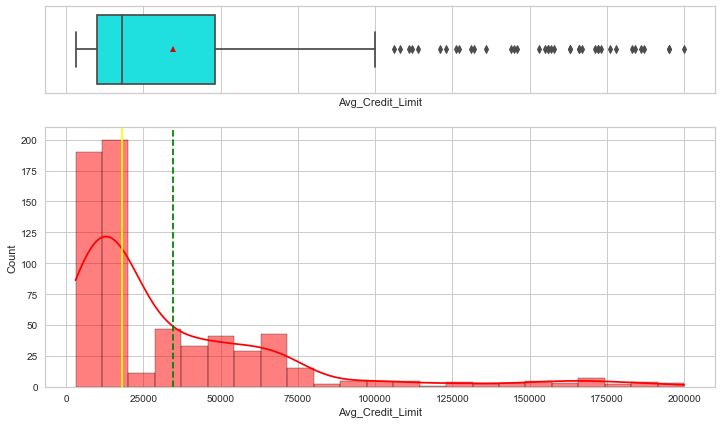

<IPython.core.display.Javascript object>

In [43]:
hist_box(data,"Avg_Credit_Limit",kde=True)


#### Observations
1. The Avg_Credit_Limit distribution is left skewed with a mean of 34574.24.
2. The data has many outliers.

## Total_Credit_Cards

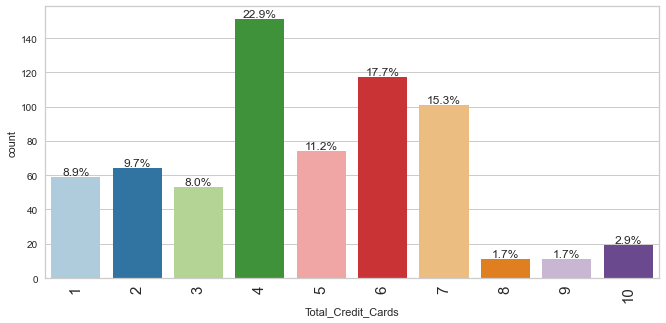

<IPython.core.display.Javascript object>

In [44]:
labeled_bar(data, "Total_Credit_Cards", perc=True)

#### Observations
1. 22.9% customers have 4 credit cards followed by 17.7% customers have 6 credit cards and 15.3% customers have 7 credit cards.
2. Only 1.7% customers have 8 credit cards and Only 1.7% customers have 9 credit cards.

## Total_visits_bank

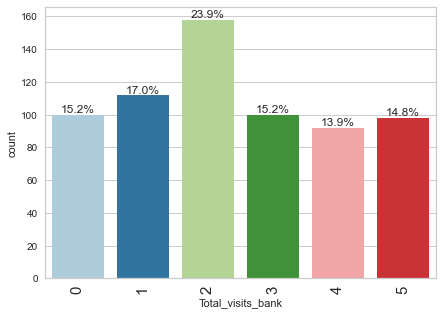

<IPython.core.display.Javascript object>

In [45]:
labeled_bar(data, "Total_visits_bank", perc=True)

#### Observations
1. 23.9% customers made 2 visits to the bank followed by 17% customers make 1 visit to the bank.
2. 14.8% customers made 5 visits to the bank.

## Total_visits_online

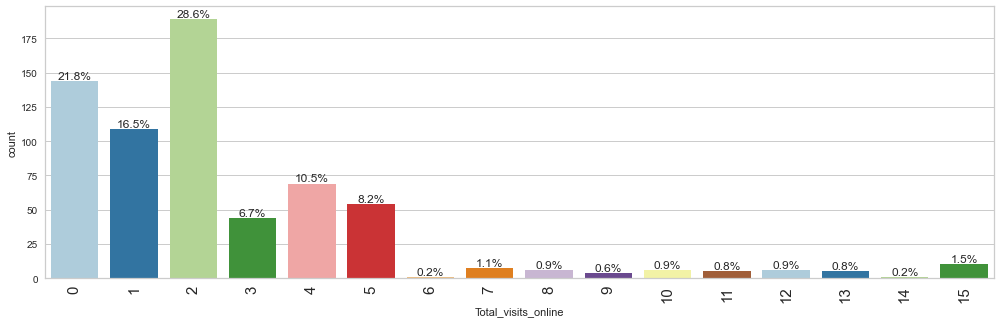

<IPython.core.display.Javascript object>

In [46]:
labeled_bar(data, "Total_visits_online", perc=True)

#### Observations
1. 28.6% customers made 2 visits online to the bank followed by 21.8% customers made no online visits to the bank.
2. 1.5% made 15 online visits to the bank.

## Total_calls_made

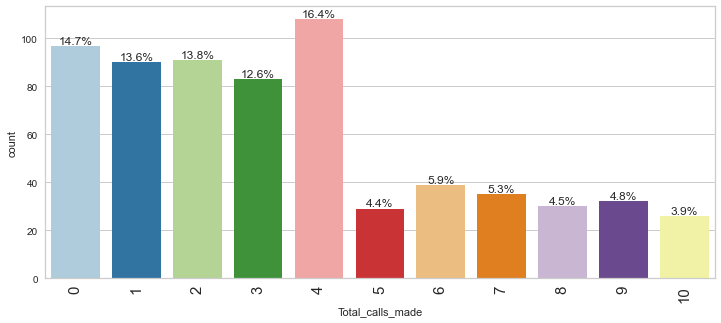

<IPython.core.display.Javascript object>

In [47]:
labeled_bar(data, "Total_calls_made", perc=True)

#### Observations
1. 16.4% customers made 4 calls followed by 14.7% customers made no calls to the bank.
3. 3.9% customers made 10 calls.

# Bivariate Analysis

## Heatmap

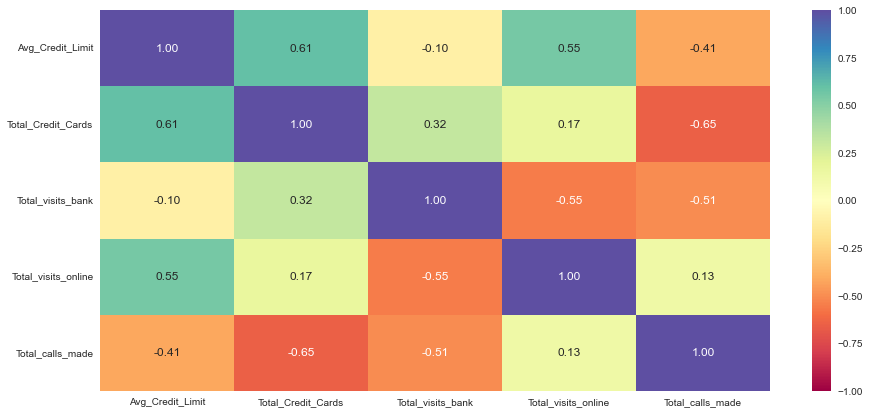

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)  # heatmap
plt.show()

#### Observations
**Positive Correlation**
1. Avg_Credit_Limit and Total_Credit_Cards are positively correlated with value of 0.61
2. Avg_Credit_Limit and Total_visits_online are positively correlated with a value of 0.55

**Negative Correlation**
1. Total_Credit_Cards and Total_calls_made are negatively correlated with value of -0.65
2. Total_visits_bank and Total_visits_online are negatively correlated with a value of -0.55

### Pairplot

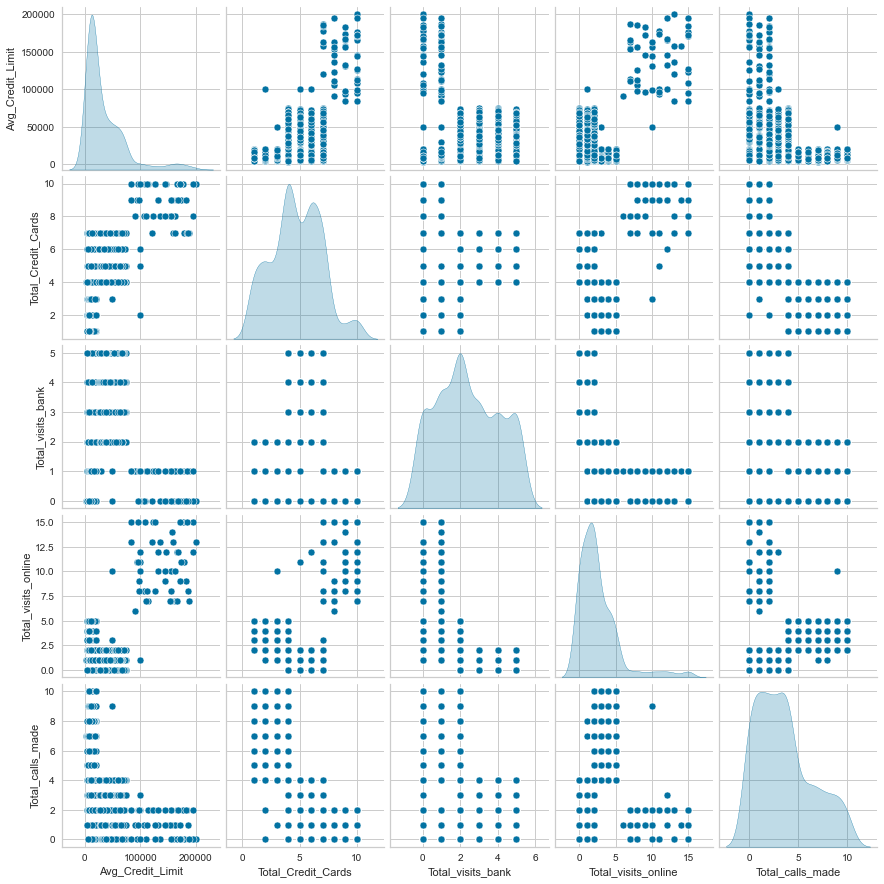

<IPython.core.display.Javascript object>

In [49]:
# Pairplot
sns.pairplot(data=data[num_cols], diag_kind="kde")
plt.show()

#### Observations
1. Higher the Avg_credit_limt above 100000 customers have many credit cards
2. Higher  Avg_credit_limt above 100000 customers visit the bank through online means.
3. Lower  Avg_credit_limt below 100000 customers visit the bank personally.
4. Lower  Avg_credit_limt below 100000 customers make esser calls as compared to Higher Avg_credit_limt above 100000 customers
5. Customers with less number of credit cards make more calls than customers with many credit cards


## Multivariate Analysis

## Business Questions

## How Avg_Credit_Limit varies with Total_Credit_Cards

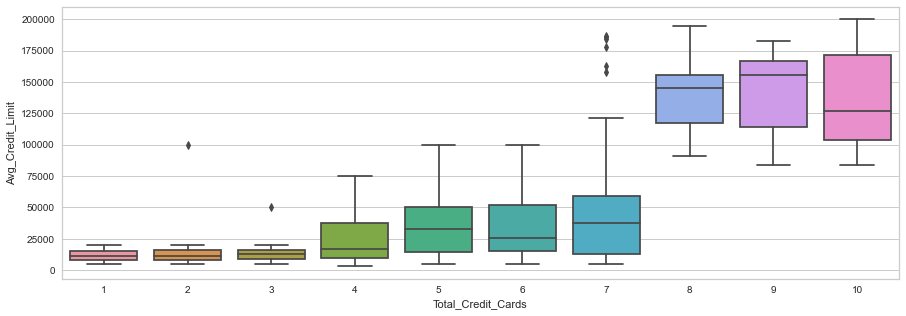

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(15, 5))
sns.boxplot(data["Total_Credit_Cards"], data["Avg_Credit_Limit"])
plt.show()

#### Observations
1. Customers with Higher Avg_Credit_Limit above 100000 mostly have 8,9,10 credit cards.
2. Customers with less Avg_Credit_Limit below 25000 have only 1,2 or  credit cards.
3. Customers with medium Avg_Credit_Limit above 15000 and below 125000 have 4,5,6,or 7 credit cards.

## How Total_visits_bank varies with Avg_Credit_Limit

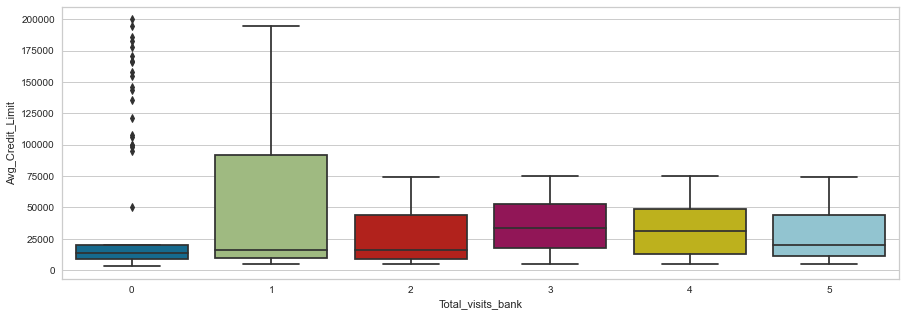

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(15, 5))
sns.boxplot(data["Total_visits_bank"], data["Avg_Credit_Limit"])
plt.show()

#### Observations
1. Customers with more physical visits to the bank have a Avg_Credit_Limit of about 15000 to 35000.
2. Customers with higher Avg_Credit_Limit make no physical visits to the bank.

## How Total_visits_online varies with Avg_Credit_Limit

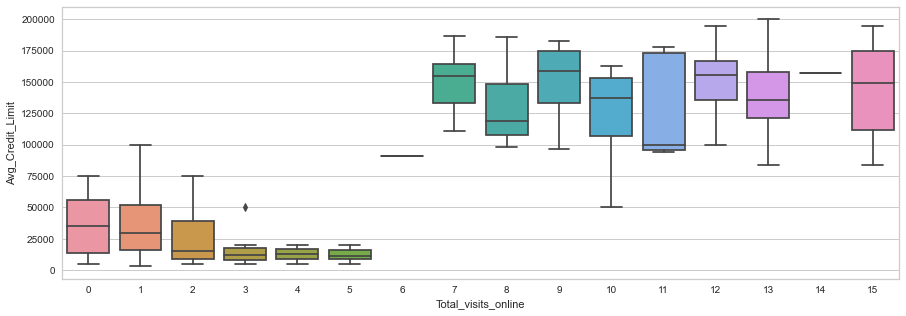

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(15, 5))
sns.boxplot(data["Total_visits_online"], data["Avg_Credit_Limit"])
plt.show()

#### Obseravtions
1. Higher Avg_Credit_Limit customers above 50000 make about 7-15 online visits 
2. Lower Avg_Credit_Limit customers below 50000 make about 1-5 or no  online visits 

## How Total_calls_made varies with Avg_Credit_Limit

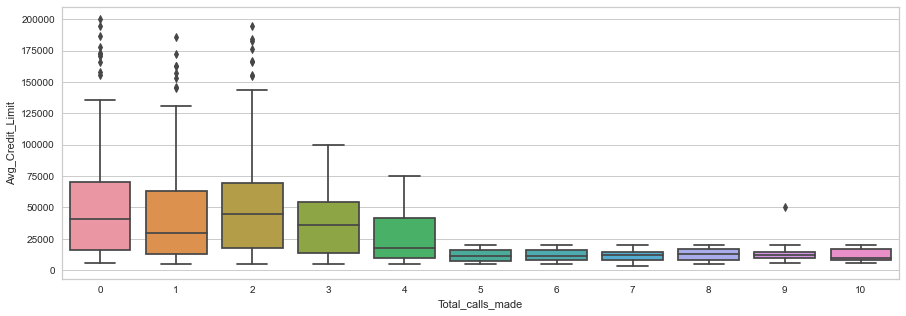

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15, 5))
sns.boxplot(data["Total_calls_made"], data["Avg_Credit_Limit"])
plt.show()

#### Obseravtions
1.  Avg_Credit_Limit customers above 25000 make about 1-4 calls or even no calls.
2.  Avg_Credit_Limit customers below 25000 make about 5-10 calls 

# Summary for EDA

## Data Description:

1. The data has 660 rows and 7 columns.
2. There are no missing values in the data.

### Data Preprocessing and Cleaning
2. "Sl_No" and "Customer Key" are not needed while we train our Clustering model Hence we drop these two columns.
3. There are no missing values in the data.
4. There are no exact duplicates in the data.
5. Hence they show important patterns. We will not delete them and keep them for clustering.
### Info
1. The dataset has 6 columns and all 6 columns are of int type
2. there are no missing values in the data.
3. The S.NO can be removed as it is of lesser importance.

### Statistical Summary
1. The average value for Avg_Credit_Limit for customers is about 34574.24 and it has a wide range varying from 3000 to 200000. There are outliers present. It has a median of 18000.
2. The average credit cards(Total_Credit_Cards ) held by customers is 5. It ranges from 1 to 10 credit cards with a median of 5.
3. The average number fo physical visits to the bank is 2 and the value ranges from 0 visit to 5 visits.
4. The average number fo online visits to the bank is 3 and the value ranges from 0 visit to 15 visits.
5. The average number of calls made to the bank is 4 and the value ranges from 0 to 10 calls.

## Outlier Analysis
1. Avg_Credit_Limit has upper outliers
2. Total_visits_online has upper outliers

### Outlier detection IQR
#### Avg_Credit_Limit IOR Outlier Detection
1. There are 11 observations beyond the 4* times IQR range for the Avg_Credit_Limit Column.
All the data are important for the model to make Clusters They can form a new clusters as well. Hence we will not remove the outliers. They hold valuable informations.
#### Avg_Credit_Limit IOR Outlier Detection
1. There is only 1 observations beyond the 4* times IQR range for the Total_visits_online Column.
All the data are important for the model to make Clusters . Hence we will not remove the outliers. They hold valuable informations.

### Outlier detection tmean
#### Avg_Credit_Limit tmean Outlier Detection
1. There is no much change in the mean for Avg_Credit_Limit. Hence we will not delete the outliers.
#### Total_visits_online tmean Outlier Detection
1. There is no much change in the mean for Total_visits_online. Hence we will not delete the outliers.

## Observations from EDA
### Univariate 

#### Avg_Credit_Limit
1. The Avg_Credit_Limit distribution is left skewed with a mean of 34574.24.
2. The data has many outliers.
#### Total_Credit_Cards
1. 22.9% customers have 4 credit cards followed by 17.7% customers have 6 credit cards and 15.3% customers have 7 credit cards.
2. Only 1.7% customers have 8 credit cards and Only 1.7% customers have 9 credit cards.
#### Total_visits_bank
1. 23.9% customers made 2 visits to the bank followed by 17% customers make 1 visit to the bank.
2. 14.8% customers made 5 visits to the bank.
#### Total_visits_online
1. 28.6% customers made 2 visits online to the bank followed by 21.8% customers made no online visits to the bank.
2. 1.5% made 15 online visits to the bank.
#### Total_calls_made
1. 16.4% customers made 4 calls followed by 14.7% customers made no calls to the bank.
2. 3.9% customers made 10 calls.



## Bivariate
### Heatmap
#### Positive Correlation

1. Avg_Credit_Limit and Total_Credit_Cards are positively correlated with value of 0.61
2. Avg_Credit_Limit and Total_visits_online are positively correlated with a value of 0.55

#### Negative Correlation

1. Total_Credit_Cards and Total_calls_made are negatively correlated with value of -0.65
2. Total_visits_bank and Total_visits_online are negatively correlated with a value of -0.55

#### Pairplot

1. Higher the Avg_credit_limt above 100000 customers have many credit cards
2. Higher Avg_credit_limt above 100000 customers visit the bank through online means.
3. Lower Avg_credit_limt below 100000 customers visit the bank personally.
4. Lower Avg_credit_limt below 100000 customers make esser calls as compared to Higher Avg_credit_limt above 100000 customers
5. Customers with less number of credit cards make more calls than customers with many credit cards

## Business Questions

#### How Total_calls_made varies with Avg_Credit_Limit
1. Avg_Credit_Limit customers above 25000 make about 1-4 calls or even no calls.
2. Avg_Credit_Limit customers below 25000 make about 5-10 calls

#### How Total_visits_online varies with Avg_Credit_Limit
1. Higher Avg_Credit_Limit customers above 50000 make about 7-15 online visits
2. Lower Avg_Credit_Limit customers below 50000 make about 1-5 or no online visits

#### How Total_visits_bank varies with Avg_Credit_Limit
1. Customers with more physical visits to the bank have a Avg_Credit_Limit of about 15000 to 35000.
2. Customers with higher Avg_Credit_Limit make no physical visits to the bank.

#### How Avg_Credit_Limit varies with Total_Credit_Cards
1. Customers with Higher Avg_Credit_Limit above 100000 mostly have 8,9,10 credit cards.
2. Customers with less Avg_Credit_Limit below 25000 have only 1,2 or credit cards.
3. Customers with medium Avg_Credit_Limit above 15000 and below 125000 have 4,5,6,or 7 credit cards.


# Scaling data before clustering

In [95]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data.copy()
scaled_data = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [96]:
# creating a dataframe with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=subset.columns)

<IPython.core.display.Javascript object>

# Kmeans Clustering

## Finding the right number of clusters

Number of clusters:  1 	Average_distortion :  2.0069222262503614
Number of clusters:  2 	Average_distortion :  1.4571553548514269
Number of clusters:  3 	Average_distortion :  1.1466276549150365
Number of clusters:  4 	Average_distortion :  1.0463825294774465
Number of clusters:  5 	Average_distortion :  0.9908683849620168
Number of clusters:  6 	Average_distortion :  0.9429882588535909
Number of clusters:  7 	Average_distortion :  0.9186646830823947
Number of clusters:  8 	Average_distortion :  0.8891946648477387


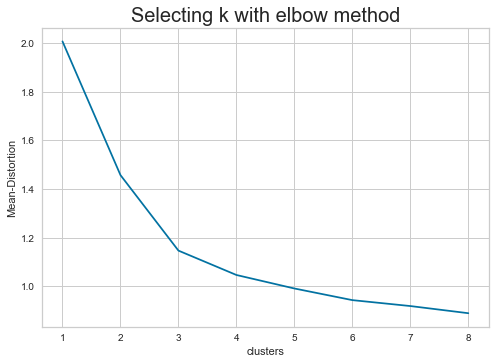

<IPython.core.display.Javascript object>

In [97]:
clusters = range(1,9)
mean_distortion=[]

for k in clusters:
    model= KMeans(n_clusters=k)# Kmeans
    model.fit(scaled_data_df)
    predictions = model.predict(scaled_data_df)
    distortion = (sum(np.min(cdist(scaled_data_df,model.cluster_centers_,metric="euclidean"),axis=1))/ scaled_data_df.shape[0])
    mean_distortion.append(distortion)
    print("Number of clusters: ",k ,"\tAverage_distortion : ",distortion )

plt.plot(clusters,mean_distortion,"bx-")
plt.xlabel("clusters")
plt.ylabel("Mean-Distortion")
plt.title("Selecting k with elbow method",fontsize=20)
plt.show()


### In the above plot, the elbow is seen for K=2, but if you observe the Average distortion results, there is some drop in distortion at K= 3,4 and 5.(Even a small elbow at K =3 and 4 is observed).

## Silhouette scores.

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.2557608798278283
For n_clusters = 7, silhouette score is 0.2482713393360752
For n_clusters = 8, silhouette score is 0.22708508639891067
For n_clusters = 9, silhouette score is 0.22671954059530933


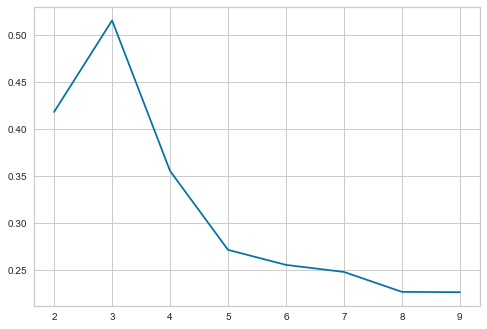

<IPython.core.display.Javascript object>

In [99]:
sil_score_kmeans = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled_data_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_data_df, preds)
    sil_score_kmeans.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score_kmeans)

### From the silhouette scores, it seems that 3 is a good value of k.

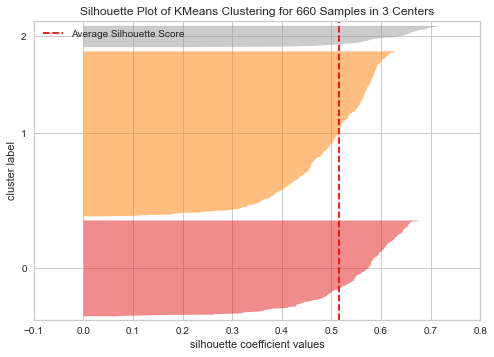

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [100]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(scaled_data_df)
visualizer.show()

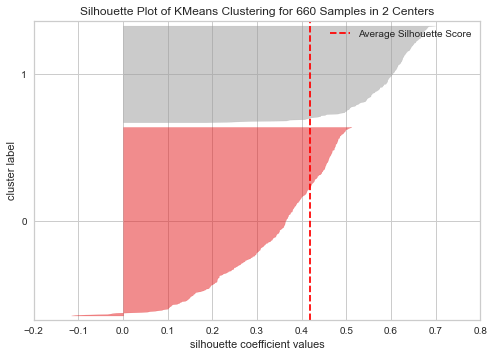

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [101]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(scaled_data_df)
visualizer.show()

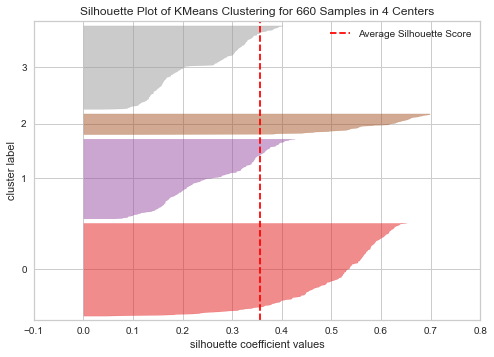

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [102]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(scaled_data_df)
visualizer.show()

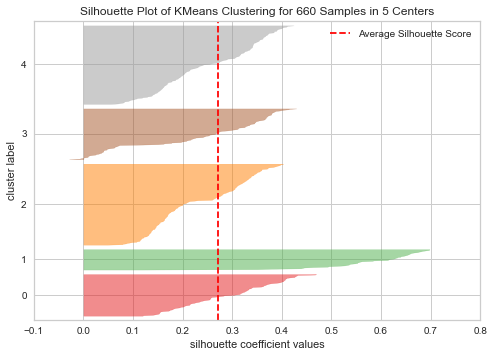

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [103]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(scaled_data_df)
visualizer.show()

### Let's take 3 as the appropriate no. of clusters(K) as the silhouette score is high enough for all the 3-clusters(above average silhouette score), and there is a knick at 3 in the elbow curve.

In [126]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data_df)

KMeans(n_clusters=3, random_state=0)

<IPython.core.display.Javascript object>

In [127]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [128]:
cluster_profile_Kmeans = data.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [129]:
cluster_profile_Kmeans["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [130]:
# let's display cluster profiles
cluster_profile_Kmeans.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,0.000000,387
1,12197.309417,2.403587,0.928251,3.560538,6.883408,2.000000,223
2,141040.000000,8.740000,0.600000,10.900000,1.080000,1.000000,50


<IPython.core.display.Javascript object>

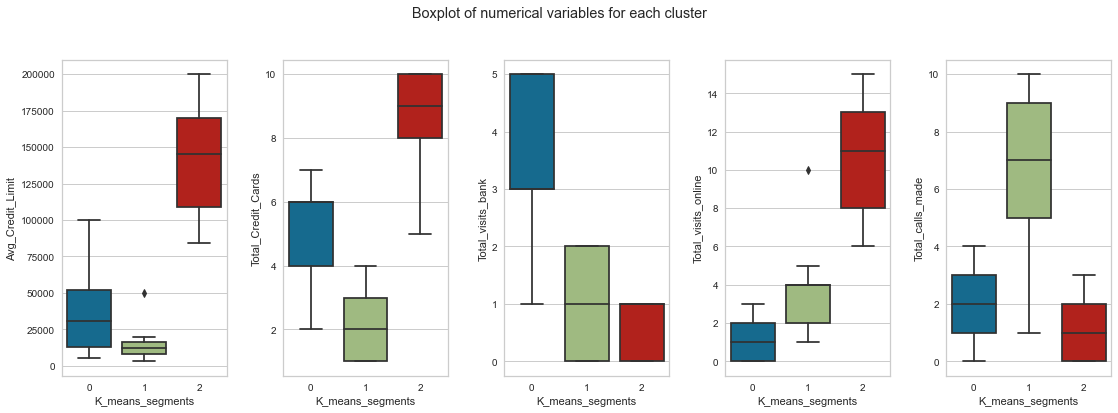

<IPython.core.display.Javascript object>

In [109]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_cols[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

 # Cluster Profilling for Kmeans Clustering

#### Cluster 0:
1. Avg_credit_Limit for this group customers is moderate with a median of 25000 and has a range between 15000-100000.
2. Total_Credit_Cards held by these customers are between 4-6.
3. Total_visits_bank by these customers are 3-5 times.
4. Total_visits_online  by these customers are only between 0-2 times.
5. Total_calls_made by these customers range from 0-4 times.

#### Cluster 1:
1. Avg_credit_Limit for this group customers is low with a median of 10000 and has a range between 0-25000.
2. Total_Credit_Cards held by these customers are between 1-4.
3. Total_visits_bank by these customers are 0-2 times.
4. Total_visits_online  by these customers are only between 2-4 times.
5. Total_calls_made by these customers range from 5-9 times.


#### Cluster 2:
1. Avg_credit_Limit for this group customers is high with a median of 135000
2. Total_Credit_Cards held by these customers are between 5-10.
3. Total_visits_bank by these customers are 0-2 times.
4. Total_visits_online  by these customers are only between 6-15 times.
5. Total_calls_made by these customers range from 0-5 times.


# Hierarchical Clustering

In [110]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(scaled_data_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_data_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801747.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134.
Cophenetic co

<IPython.core.display.Javascript object>

In [111]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

In [112]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(scaled_data_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(scaled_data_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


<IPython.core.display.Javascript object>

In [113]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


<IPython.core.display.Javascript object>

### We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

## Dendrograms for the different linkage methods.

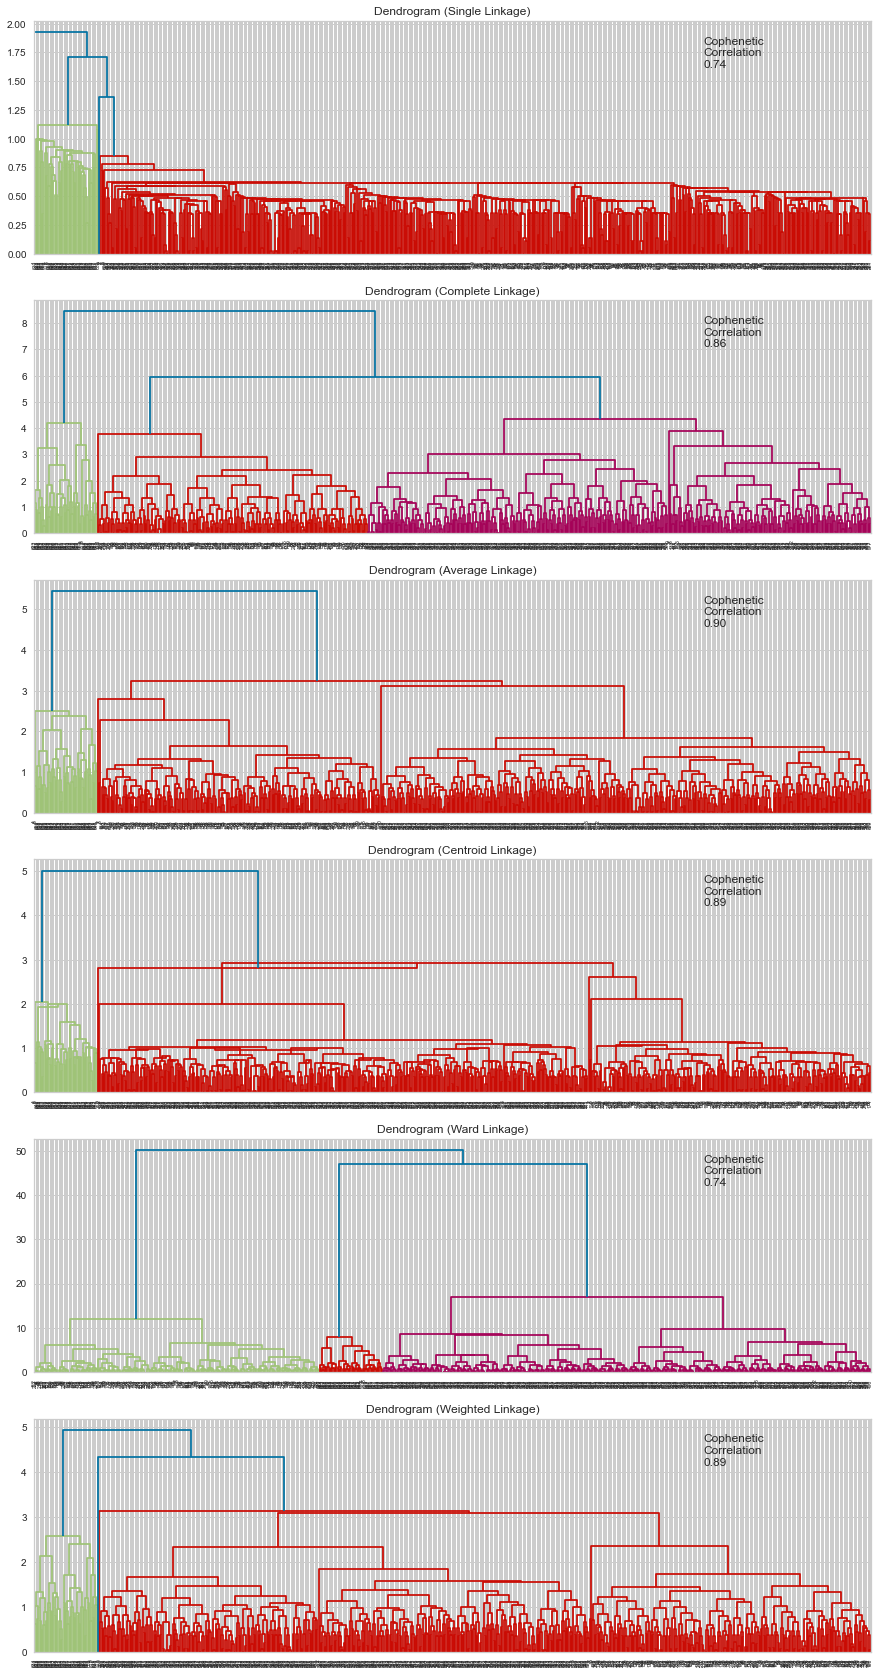

<IPython.core.display.Javascript object>

In [114]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_data_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_data_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observations

1. The cophenetic correlation is highest for average and centroid linkage methods.
2. We will move ahead with Average linkage.
3. 3 appears to be the appropriate number of clusters from the dendrogram for Centroid linkage.
4. The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where dendrogram height is maximum as it generally corresponds to distinct and homogeneous clusters. The dendrogram for centroid linkage had the highest cophenetic correlation. So we can use centroid linkage and have chosen 6 clusters as the dendrogram height is pretty high. (The maximum height is for 3, but that would not be meaningful as it would give two clusters with one country each and one cluster will all the other countries).

## Lets visualize the dendrogram cut for average link in the below plot

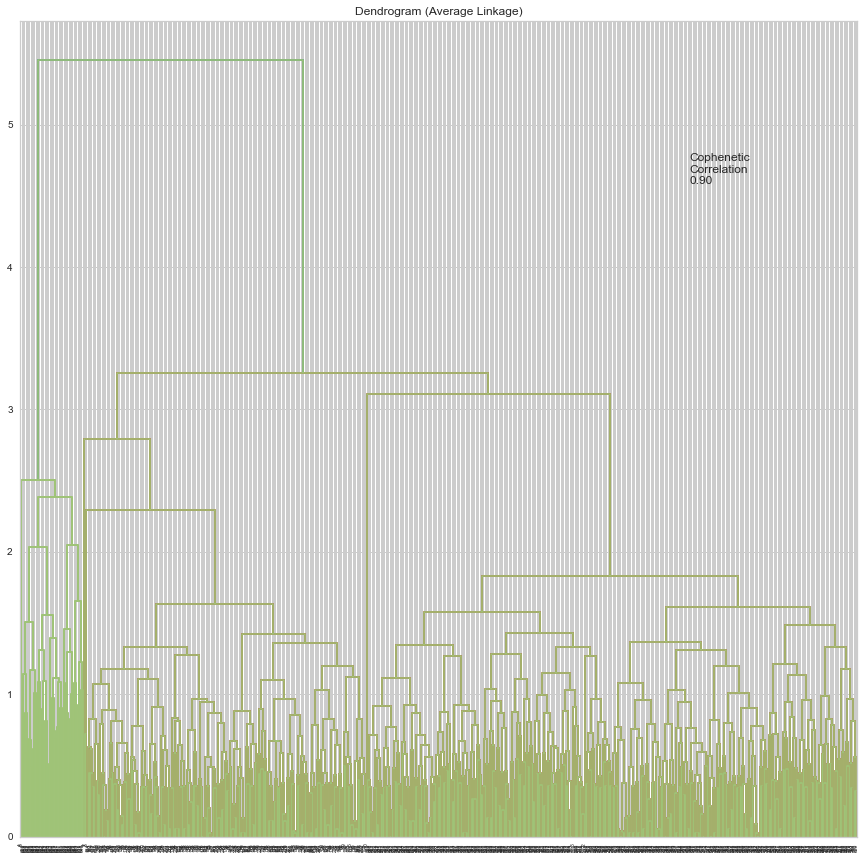

<IPython.core.display.Javascript object>

In [115]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_data_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_data_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=7.3, c="red", lw=1, linestyle="dashdot")

## Silhouette_score for Agglomerative Clustering

For n_clusters = 2, silhouette score is 0.417704147620949
For n_clusters = 3, silhouette score is 0.5147639589977819
For n_clusters = 4, silhouette score is 0.3480822581261928
For n_clusters = 5, silhouette score is 0.2569177732675831
For n_clusters = 6, silhouette score is 0.22677849725544041
For n_clusters = 7, silhouette score is 0.2162968685485734
For n_clusters = 8, silhouette score is 0.2186949061936046
For n_clusters = 9, silhouette score is 0.19527074669093417


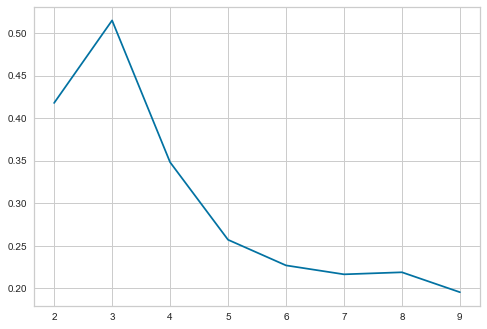

<IPython.core.display.Javascript object>

In [116]:
sil_score_hierarchical = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled_data_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_data_df, preds)
    sil_score_hierarchical.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score_hierarchical)

## k=3 or 4 looks like a good choice for the number of clusters as the silhouette scores are also high with clusters=3 or 4

In [133]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(scaled_data_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

In [134]:
scaled_data_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [135]:
cluster_profile_Heirarchial = data.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [136]:
cluster_profile_Heirarchial["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [137]:
# lets display cluster profile
cluster_profile_Heirarchial.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,0.000000,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,1.000000,223


<IPython.core.display.Javascript object>

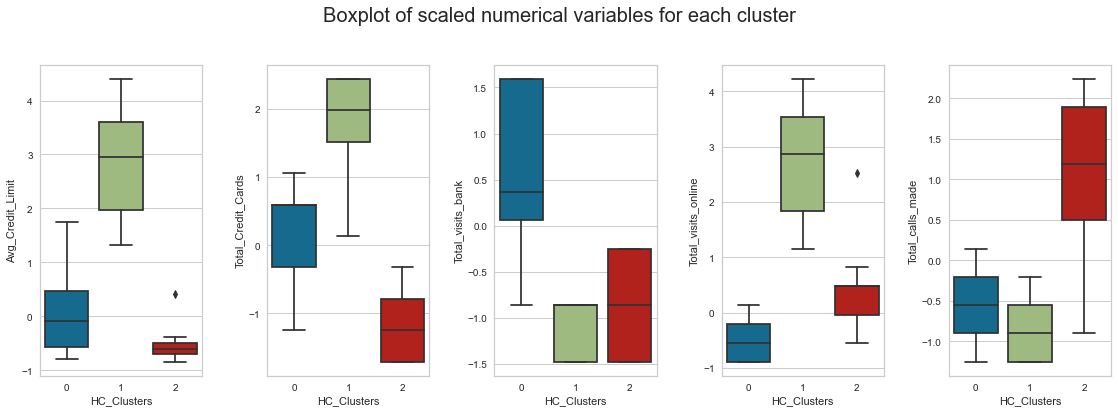

<IPython.core.display.Javascript object>

In [122]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=scaled_data_df[num_cols[counter]],
        x=scaled_data_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

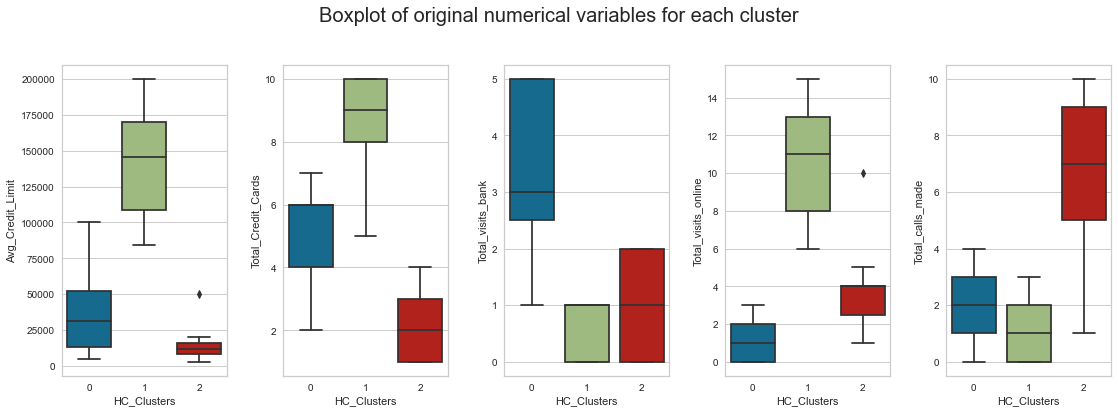

<IPython.core.display.Javascript object>

In [123]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_cols[counter]], x=data["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

# Cluster Profilling for Hierarchical Clustering

#### Cluster 0:
1. Avg_credit_Limit for this group customers is moderate with a median of 30000 and has a range between 10000-100000.
2. Total_Credit_Cards held by these customers are between 2-7.
3. Total_visits_bank by these customers are 1-5 times.
4. Total_visits_online  by these customers are only between 0-3 times.
5. Total_calls_made by these customers range from 0-4 times.

#### Cluster 1:
1. Avg_credit_Limit for this group customers is high with a median of 140000 and has a range between 80000-200000.
2. Total_Credit_Cards held by these customers are between 5-10.
3. Total_visits_bank by these customers are 0-1 times.
4. Total_visits_online  by these customers are only between 6-15 times.
5. Total_calls_made by these customers range from 0-3 times.


#### Cluster 2:
1. Avg_credit_Limit for this group customers is low with a median of 15000
2. Total_Credit_Cards held by these customers are between 0-4.
3. Total_visits_bank by these customers are 0-2 times.
4. Total_visits_online  by these customers are only between 1-5 times.
5. Total_calls_made by these customers range from 5-10 times.


# K-means vs Hierarchical Clustering

## Which clustering technique took less time for execution?

In [ ]:
Kmeans Clustering took lesser time when comapred to Hierarchical Clustering

## Which clustering technique gave you more distinct clusters, or are they the same?

In [ ]:
Both K-means and Hierarchical Clustering gave the same number of clusters k=3 in both the cases

## How do the silhouette scores vary?

In [124]:
print(sil_score_kmeans)

[0.41842496663215445, 0.5157182558881063, 0.3556670619372605, 0.2717470361089752, 0.2557608798278283, 0.2482713393360752, 0.22708508639891067, 0.22671954059530933]


<IPython.core.display.Javascript object>

In [125]:
print(sil_score_hierarchical)

[0.417704147620949, 0.5147639589977819, 0.3480822581261928, 0.2569177732675831, 0.22677849725544041, 0.2162968685485734, 0.2186949061936046, 0.19527074669093417]


<IPython.core.display.Javascript object>

#### Observations
1. They are almost similar but Kmeans silhouette scores has a little better score when comapared to hierarchical silhouette scores

## How many observations are there in the similar clusters of both algorithms?

### Kmeans Clutering count_in_each_segment

In [132]:
cluster_profile_Kmeans.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,0.000000,387
1,12197.309417,2.403587,0.928251,3.560538,6.883408,2.000000,223
2,141040.000000,8.740000,0.600000,10.900000,1.080000,1.000000,50


<IPython.core.display.Javascript object>

### Heirarchial Clutering count_in_each_segment

In [138]:
# lets display cluster profile
cluster_profile_Heirarchial.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,0.000000,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,1.000000,223


<IPython.core.display.Javascript object>

#### Observations
1. The number of observation are the same in the clusters, only that the cluster numbering has changed.

## How many clusters are obtained as the appropriate number of clusters from both algorithms?

#### Observations
From both the clustering methods no_of_ckusters=3 is an appropriate number of clusters

# PCA

In [141]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data_df)

<IPython.core.display.Javascript object>

### Observing above results in a dataframe

In [142]:
# PCA Dataframe
pca_df = pd.DataFrame(
    data=pca_data, columns=["Principal Component 1", "Principal Component 2"]
)
pca_df.tail()

,Principal Component 1,Principal Component 2
655,-1.261972,3.828526
656,-0.639127,4.175576
657,-1.003732,4.004943
658,-1.441149,6.037562
659,-0.742163,5.329147


<IPython.core.display.Javascript object>

In [143]:
print(
    "Explained variance per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained variance per principal component: [0.4989422  0.34123771]


<IPython.core.display.Javascript object>

#### Observations

1. In the above result, the explained variance is shown.
2. The first principal component explains 49% of total variance in the data.
3. The second principal component explains 34% of total variance in the data.
4. We see a  reduction in dimensions, from 5 to 2, and the 2 dimensions explain nearly 83% of total variance in the data.
5. PCA has explained a larger variance in the data.


### Eigen Values

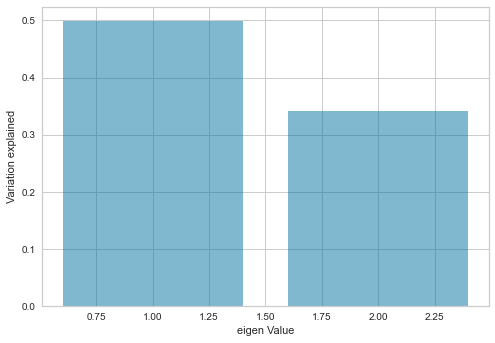

<IPython.core.display.Javascript object>

In [144]:
plt.bar(list(range(1, 3)), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.ylabel("Variation explained")
plt.xlabel("eigen Value")
plt.show()

### Cumulative Eigen Values

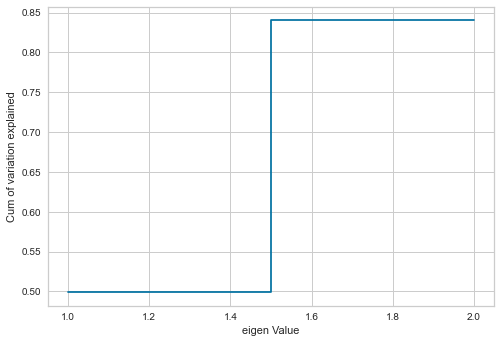

<IPython.core.display.Javascript object>

In [145]:
plt.step(list(range(1, 3)), np.cumsum(pca.explained_variance_ratio_), where="mid")
plt.ylabel("Cum of variation explained")
plt.xlabel("eigen Value")
plt.show()

# Visualizing the data in the lower dimension
1. We can visualize data in 2 dimensions and also data in 3 dimensions (using 3-D plots).
2. In some cases, we can also visualize data in 4 dimensions by using different hues for the 4th dimension in a 3-D plot.
3. But it's impossible for us to visualize and interpret data in 5 dimensions.
4. So using PCA, we scaled down to 2 dimensions, and now it's easy for us to visualize the data.

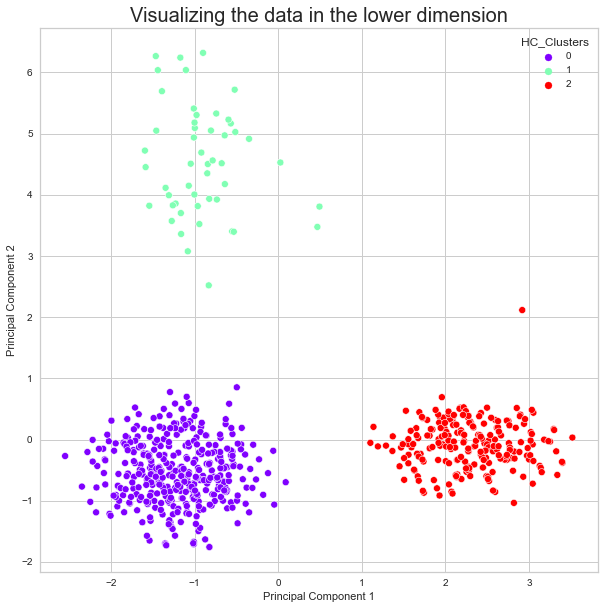

<IPython.core.display.Javascript object>

In [147]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=pca_df,
    x="Principal Component 1",
    y="Principal Component 2",
    hue=data["HC_Clusters"],
    palette="rainbow",
)
plt.title("Visualizing the data in the lower dimension", fontsize=20)
plt.show()

## Insights
1. From the above plot, we can observe that the 3 classes , when projected to a two-dimensional space, can be linearly separable .
2. Other observations is that the 3 clusters is clearly separated out and can be compared to  each other.


# Applying t-distributed Stochastic Neighbor Embedding (t-SNE)


#### In the next few lines of code, we will be projecting the 5-dimensional Bank data to two-dimensions using t-SNE.

1. Original dimensions = 5
2. Dimensions after applying t-SNE = 2


In [148]:
# to perform t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
tsne_data = tsne.fit_transform(scaled_data_df)

<IPython.core.display.Javascript object>

## tsne DataFrame

In [160]:
tsne_df = pd.DataFrame(data=tsne_data, columns=["Component 1", "Component 2"])
tsne_df.tail()

,Component 1,Component 2
655,-34.459366,21.228592
656,-35.859436,19.897249
657,-35.201935,23.440609
658,-39.141521,21.747231
659,-37.614059,22.807327


<IPython.core.display.Javascript object>

### Visualizing the tsne_df data in the lower dimension

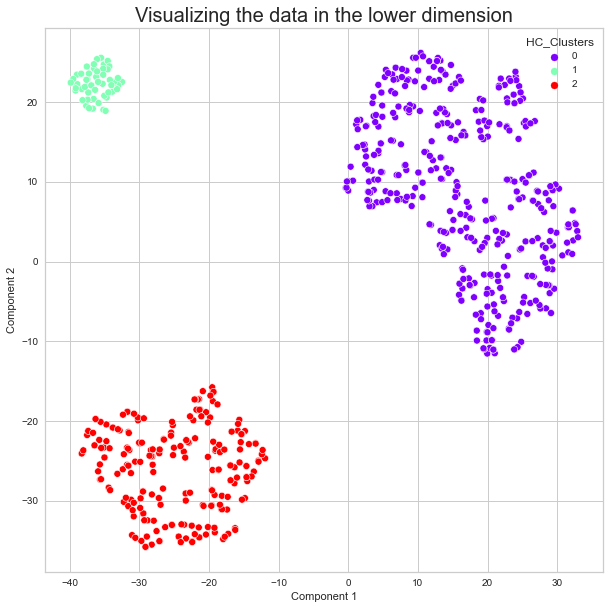

<IPython.core.display.Javascript object>

In [166]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=tsne_df,
    x="Component 1",
    y="Component 2",
    hue=data["HC_Clusters"],
    palette="rainbow",
)
plt.title(
    "Visualizing the data in the lower dimension", fontsize=20,
)
plt.show()

#### Insights
1. From the above plot, we can observe that the 3 clusters , when projected to a two-dimensional space, are linearly separable to a large extent.
2.  the cluster 1 class are far away from the rest and forms a small cluster.
3. Cluster 0 forms a large cluster

#  Running t-SNE with different values of perplexity

Visualizing the lower dimensional representation of data for different values of perplexity


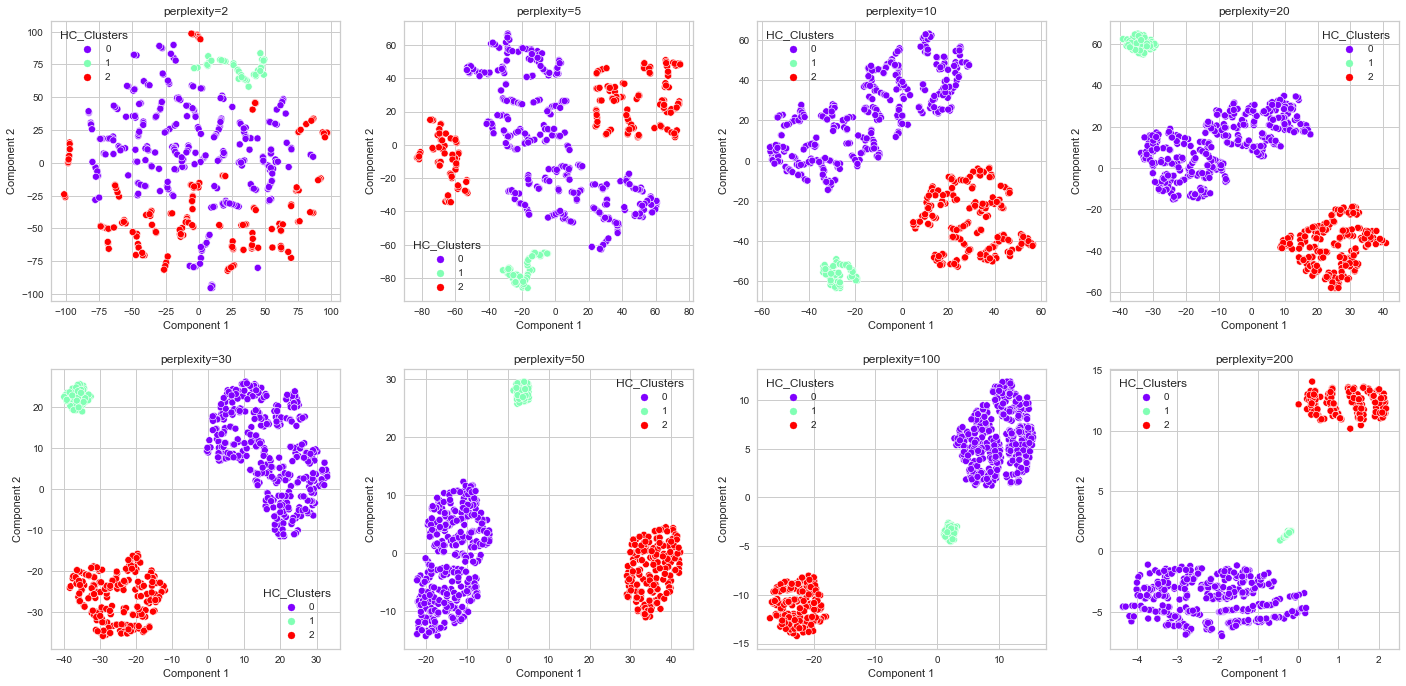

<IPython.core.display.Javascript object>

In [167]:
perplexity = [2, 5, 10, 20, 30, 50, 100, 200]

plt.figure(figsize=(20, 10))
print(
    "Visualizing the lower dimensional representation of data for different values of perplexity"
)

for i in range(len(perplexity)):
    tsne = TSNE(n_components=2, perplexity=perplexity[i], n_jobs=-2, random_state=1)
    # n_jobs specifies the number of parallel jobs to run
    # -2 means using all processors except one
    X_red = tsne.fit_transform(scaled_data_df)

    red_data_df = pd.DataFrame(data=X_red, columns=["Component 1", "Component 2"])

    plt.subplot(2, int(len(perplexity) / 2), i + 1)

    plt.title("perplexity=" + str(perplexity[i]))
    sns.scatterplot(data=red_data_df, x="Component 1", y="Component 2" ,  hue=data["HC_Clusters"],palette="rainbow")
    plt.tight_layout(pad=2)


#### Observations
1. With low perplexity value (2), data points are more scattered.
2. With perplexity values ranging from 5 to 50, three distinct groups are clearly visible.
3. With very high value of perplexity (100 and 200), the groups are still separable but slightly more spread out.

# Business Recommendations

### Lets consider the Kmeans clustering to make the Business Recommendations

The bank since wants to increase the credit card sales and also has taken an effort to improve the customer service team to solve queries of customers the bank should follow the following recommendations


## Cluster 0: 
1. Since these customers are the middle range customers the bank should improve on the schemes of the different credit cards so they are attracted to buy more credit cards.
2. They can provide options like 0 apr credit cards so they get more attracted.
3. More discounts and tie ups with retail and fligt tickets and accomodation booking with their credit cards has to be initiated.
4. Mostly these customers have a moderate income and hence they can be attracted by giving them genueine interest rates and a good customer service.
5. Since they visit the bank a lot of times, an assigned person with all the answers for their queries have to be appointed which develops more trust.
6. Add campaigns in shopping malls, TV commercials can pull them.
7. Many adds on social media platforms can help in sales

## Cluster 1: 
1. Since these customers are a little below middle range customers, the bank has to open up many schemes with low interest rates and high pay back time.
2. Many campaigns in blue-collar work places and shopping malls etc have to initiated in order to spread the new schemes details.
3. 24/7 support has to be lauched for them as they will have to be educated on the benefits of the scheme they choose.
4. Call support should be as strong by which they can convert the call into a sale.
5. Many lucky draw contests and flashy games can be conducted to bring them in.
6. Adds with great celebreties can be telecasted on TV and social media.
7. Many shopping places can offer purchase through card mandatory so that customers can go cashless.
8. Since this cluster forms with low income customers more customer information centers have to installed in all high crowded places to educate them on importance and benefits of credit cards.

## Cluster 2: 
1. Since these customers are higher range customers care should be taken that they dont loose any customers and also attract more.
2. The customer care should be given 24/7 for any problems involved.
3. 0% apr scehmes can be givne.
4. more tie ups with retail, flight and accomodation can be provided.
5. In Business conferences and elite places the campaigns and other exiting ideas can be pitched.
6. Bundle of credit cards, a system where they buy credit card bundles with good credit_limit can be introduced.
7. Since this cluster forms with high income customers more word of mouth and also advertisements will bring the bank more customers.
8. There should be an AI chat bot to answer all their questions online as they mostly only visit the bank website for details.
9. Automatic emails should reach the customers with attrative offers and other new immediate informations.

